## Stochastic Gradient Descent

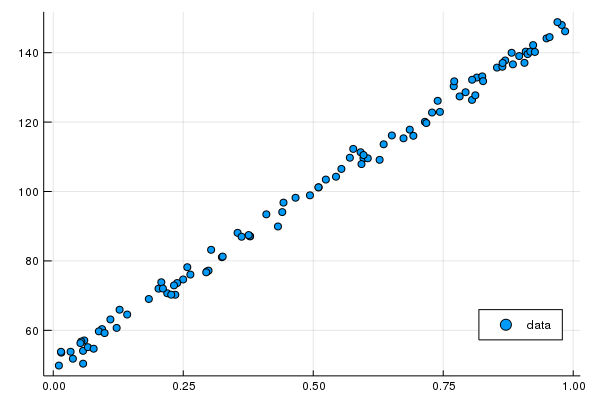

In [9]:
# generate 100 data points scattered around a straight line and plot
using Plots, LinearAlgebra
regX = rand(100)
regY = 50 .+ 100 * regX + 2 * randn(100);
scatter(regX, regY, fmt = :png, legend=:bottomright, label="data")

In [26]:
# exact solution
ϕ = hcat(regX.^0, regX.^1)
δ = 0.01
θ = inv(ϕ'ϕ + δ^2*I)*ϕ'regY

2-element Array{Float64,1}:
 50.11217203289368
 99.4907454010837 

In [11]:
function loss(X,y,θ)
    cost = (y .- X*θ)'*(y .- X*θ)
    grad = - 2 * X'y + 2*X'X*θ
    return (cost, grad)
end

loss (generic function with 1 method)

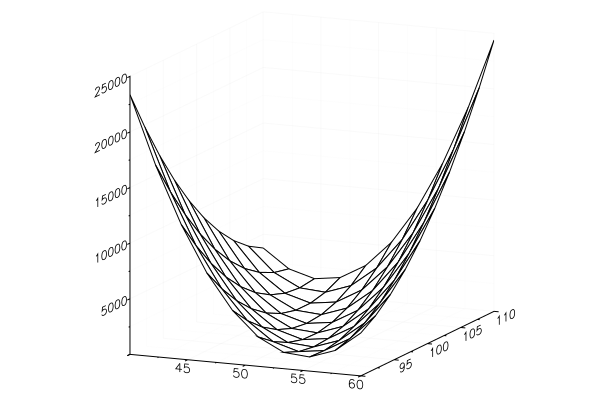

In [35]:
using Plots
xr=range(40,stop=60,length=10)
yr=range(90,stop=110,length=10)
X = hcat(ones(length(regX)), regX)
f(x,y) = loss(X,regY,[x y]')[1][1] 
# scatter(regX, regY, regZ, label="data", colour="blue", fmt = :png)
plot(xr,yr,f,st=:wireframe, fmt = :png, label="loss", colour="blue") 


In [24]:
f(50.11183065165801,99.49152488683228)

374.4909573576645

In [27]:
using StatsBase
function sgd(loss, X, y, θ_start, η, n, num_iters)
    #=
       Arguments:
       loss -- the function to optimize, 
               it takes a data set X, y and
               a parameter set, θ
               and yields two outputs, 
               a cost and the gradient
               with respect to θ
       theta0 -- the initial guestimate for θ
       η -- the learning rate
       n -- batch size
       num_iters -- total iterations to run SGD for
       Returns:
       theta -- the parameter value after SGD finishes
       path -- estimates for optimal θ along the way
    =#
    data = [(X[i,:],y[i]) for i in 1:length(y)]
    θ = θ_start
    path = θ
    for iter in 1:num_iters
        s = sample(data,n)
        Xs = hcat(first.(s)...)'
        ys = last.(s)
        cost, grad = loss(Xs,ys,θ)
        θ = θ .- ( ( η * num_iters/(num_iters+iter) * grad) / n )
        path = hcat(path,θ)
    end
    return (θ,path)
end

sgd (generic function with 1 method)

In [36]:
X = hcat(ones(length(regX)), regX)
y = regY
(t,p) = sgd(loss, X, y, [40 90]', 0.1, 1, 500)

([50.4522; 99.6898], [40.0 42.8796 … 50.6449 50.4522; 90.0 91.2682 … 99.7523 99.6898])

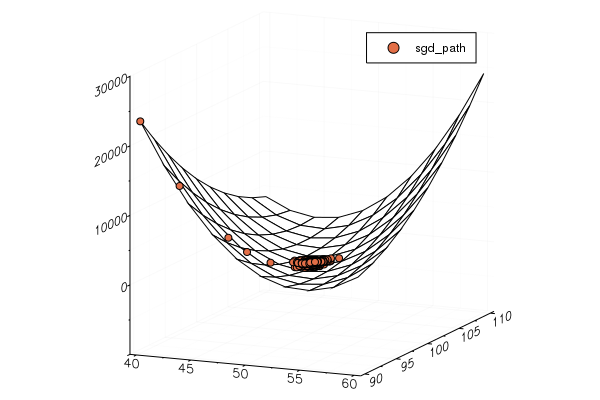

In [37]:
scatter!(p[1,:],p[2,:],f.(p[1,:],p[2,:]),(label="sgd_path"))